# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [2]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = r'C:\Users\ring3\OneDrive\文件\code\ML_marathon\D18'

### 之前做過的處理

In [3]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [4]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [32]:
app_train["AMT_INCOME_TOTAL_width"] = pd.cut(app_train["AMT_INCOME_TOTAL"], 10000)

In [10]:
app_train[:100]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM,AMT_INCOME_TOTAL_width
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False,"(-91324.35, 5874367.5]"
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False,"(-91324.35, 5874367.5]"
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False,"(-91324.35, 5874367.5]"
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,False,"(-91324.35, 5874367.5]"
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False,"(-91324.35, 5874367.5]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,100113,0,0,M,1,0,0,76500.0,135000.0,6696.0,...,0,0,0.0,0.0,0.0,0.0,0.0,2.0,False,"(-91324.35, 5874367.5]"
96,100114,0,0,F,0,1,0,135000.0,284400.0,22599.0,...,0,0,0.0,0.0,0.0,0.0,0.0,2.0,False,"(-91324.35, 5874367.5]"
97,100115,0,0,F,0,0,0,90000.0,315000.0,14683.5,...,0,0,0.0,0.0,0.0,0.0,2.0,2.0,False,"(-91324.35, 5874367.5]"
98,100116,0,0,F,0,1,0,243000.0,900000.0,32017.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False,"(-91324.35, 5874367.5]"


In [33]:
app_train["AMT_INCOME_TOTAL_width"].value_counts()

(130926.915, 142624.35]        36929
(107532.045, 119229.48]        35820
(154321.785, 166019.22]        28579
(177716.655, 189414.09]        27148
(84137.175, 95834.61]          26222
                               ...  
(77018167.17, 77029864.605]        0
(77006469.735, 77018167.17]        0
(76994772.3, 77006469.735]         0
(76983074.865, 76994772.3]         0
(58501127.565, 58512825.0]         0
Name: AMT_INCOME_TOTAL_width, Length: 10000, dtype: int64

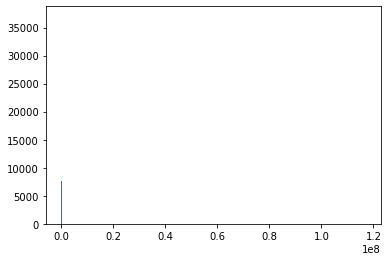

In [36]:
plt.hist(app_train["AMT_INCOME_TOTAL"], bins=10000)
plt.show()

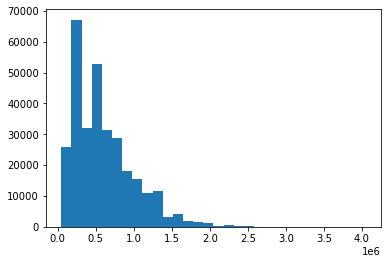

In [18]:
plt.hist(app_train["AMT_CREDIT"], bins=30)
plt.show()

In [38]:
#平均薪資男性高於女性
app_train.groupby(by=app_train['CODE_GENDER']).mean()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM
CODE_GENDER,,,,,,,,,,,,,,,,,,,,,
F,278235.964094,0.069993,0.097052,0.222077,0.708404,0.392397,156032.309247,592766.717305,26304.815242,532406.220509,...,0.000514,0.000454,0.000020,0.006212,0.006910,0.034590,0.261551,0.269703,1.924312,0.223618
M,278076.627828,0.101419,0.091634,0.567548,0.665274,0.464548,193396.482153,611095.197084,28657.681177,549942.314404,...,0.000752,0.000609,0.000942,0.006776,0.007178,0.033915,0.278855,0.257166,1.852091,0.096165
XNA,200636.500000,0.000000,1.000000,0.500000,1.000000,0.750000,186750.000000,399375.000000,19968.750000,421875.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.250000,3.500000,0.000000


In [40]:
#擁有薪資者年收入大於無車輛者40000美金
app_train.groupby(by=app_train['FLAG_OWN_CAR']).mean()["AMT_INCOME_TOTAL"]

FLAG_OWN_CAR
0    154603.326933
1    196338.851352
Name: AMT_INCOME_TOTAL, dtype: float64